In [ ]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('customer_support_tickets (3).csv')
df.head()


Saving customer_support_tickets (3).csv to customer_support_tickets (3).csv


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
# Drop columns that won't help in prediction
df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Description', 'Resolution'], axis=1, inplace=True)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert date columns to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Purchase_Year'] = df['Date of Purchase'].dt.year
df['Purchase_Month'] = df['Date of Purchase'].dt.month
df.drop('Date of Purchase', axis=1, inplace=True)


/tmp/ipython-input-3-3054879732.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


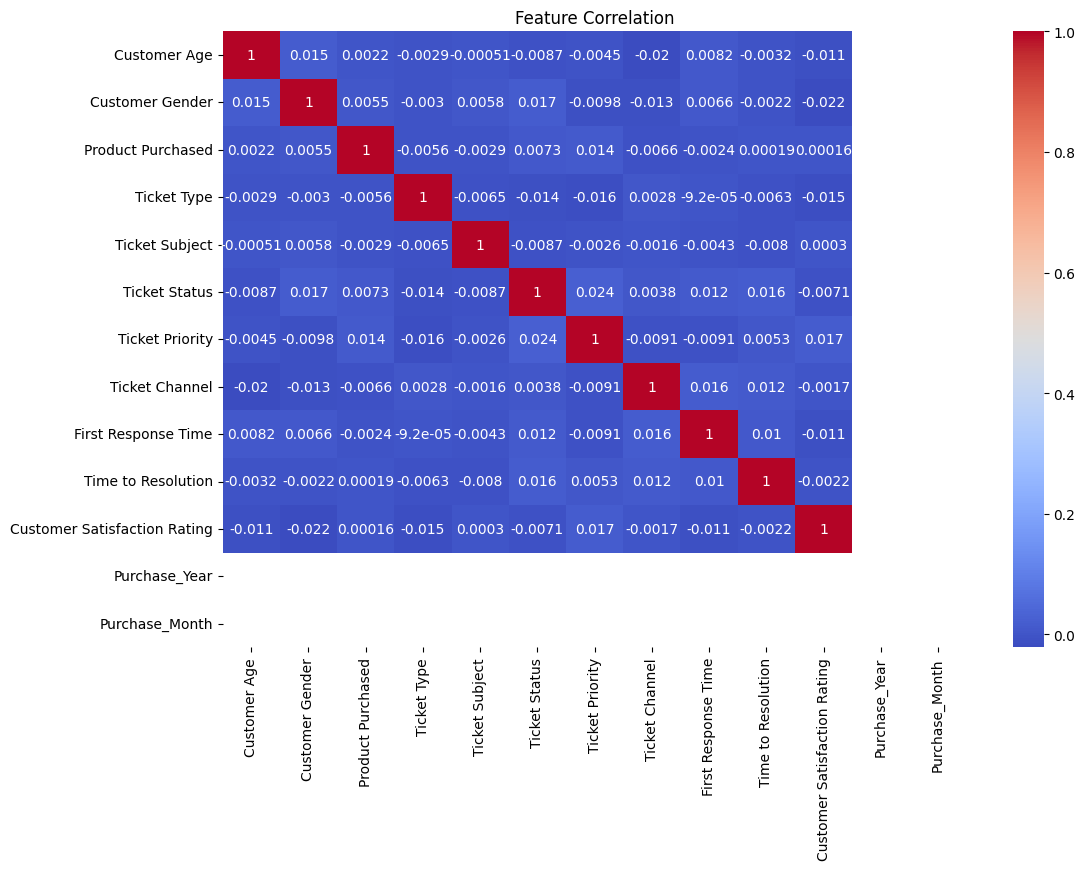

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check how many NaNs are in the target variable
print("Missing values in y:", y.isna().sum())
# Combine X and y to drop rows with missing target
df_clean = df.dropna(subset=['Customer Satisfaction Rating'])

# Re-split the cleaned data
X = df_clean.drop('Customer Satisfaction Rating', axis=1)
y = df_clean['Customer Satisfaction Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Missing values in y: 2
Accuracy: 0.2449822904368359
              precision    recall  f1-score   support

         1.0       0.25      0.26      0.25       353
         2.0       0.26      0.26      0.26       342
         3.0       0.27      0.31      0.29       349
         4.0       0.22      0.22      0.22       320
         5.0       0.23      0.17      0.19       330

    accuracy                           0.24      1694
   macro avg       0.24      0.24      0.24      1694
weighted avg       0.24      0.24      0.24      1694



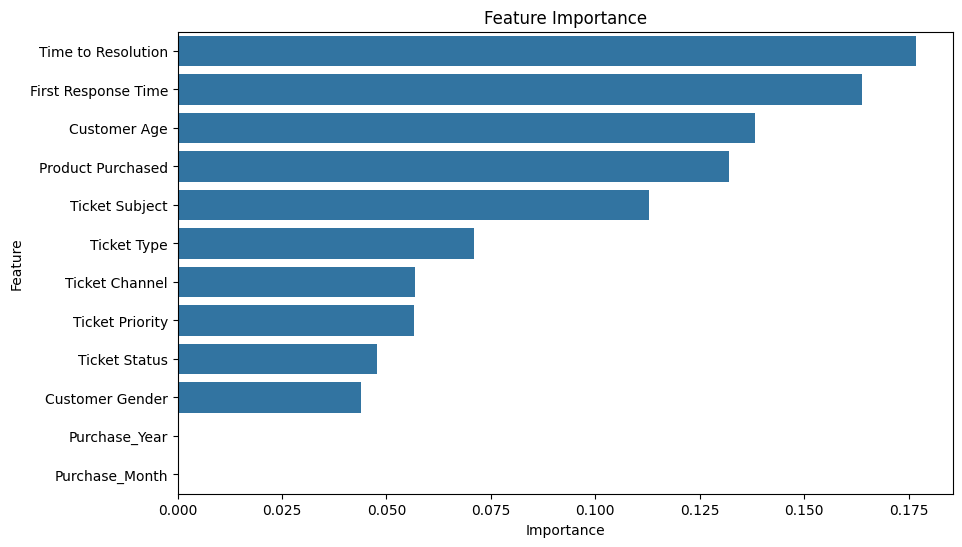

In [ ]:
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.show()
